In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
%matplotlib inline
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from scipy.cluster.hierarchy import dendrogram,linkage
import itertools
from sklearn.decomposition import PCA

C:\Users\Hari\Anaconda_3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
train=pd.read_csv('Training Data Set_N.csv')
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [3]:
test=pd.read_csv('Test Data Set.csv')
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [5]:
train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [6]:
train.drop('body_type',1,inplace=True)

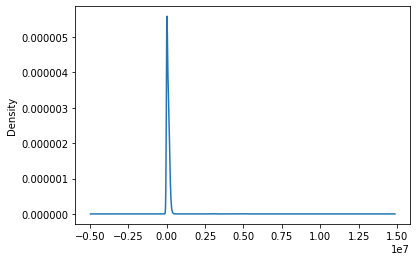

In [7]:
train['distance'].plot(kind='kde')

In [8]:
missing=train.isna().sum().sort_values(ascending=False)

In [9]:
percentage=(train.isna().sum()/len(train)).sort_values(ascending=False)

In [10]:
missing_data=pd.concat([missing,percentage],axis=1,keys=['missing','percentage'])

In [11]:
missing_data

,missing,percentage
engine_power,1439,0.026890
distance,1211,0.022629
Price,0,0.000000
fuel_type,0,0.000000
seat_count,0,0.000000
door_count,0,0.000000
transmission,0,0.000000
Vroom Audit Rating,0,0.000000
engine_displacement,0,0.000000
Age of car,0,0.000000


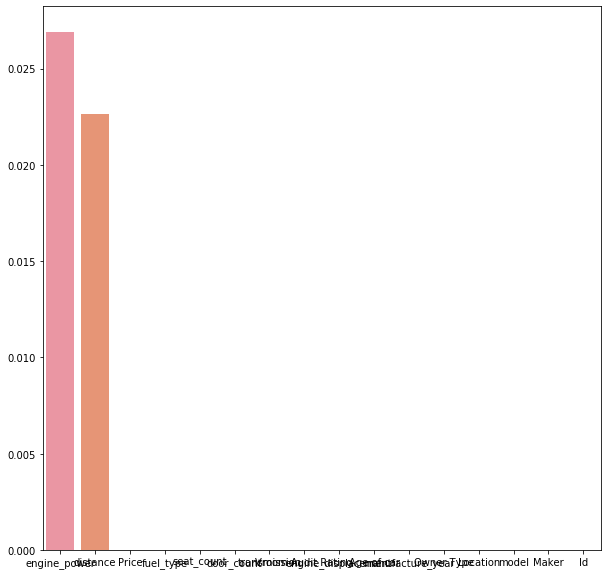

In [12]:
f,ax=plt.subplots(figsize=(10,10))
sns.barplot(x=missing_data.index,y=percentage,data=missing_data)

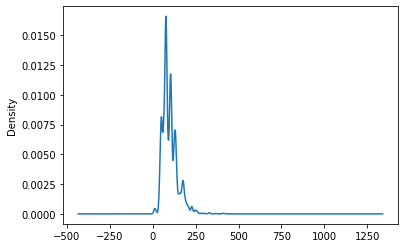

In [13]:
train['engine_power'].plot(kind='kde')

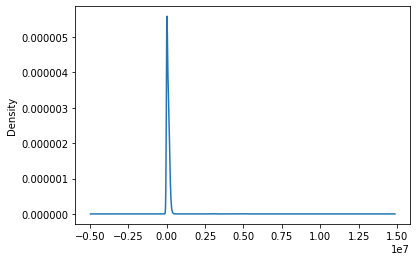

In [14]:
train['distance'].plot(kind='kde')

In [15]:
train.corr()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000282,0.001935,-0.001935,0.003698,0.002456,0.005602,0.003195
distance,-0.000282,1.000000,-0.229124,0.229124,0.111261,0.012034,-0.006298,-0.158515
manufacture_year,0.001935,-0.229124,1.000000,-1.000000,-0.090401,0.051245,0.003985,0.506707
Age of car,-0.001935,0.229124,-1.000000,1.000000,0.090401,-0.051245,-0.003985,-0.506707
engine_displacement,0.003698,0.111261,-0.090401,0.090401,1.000000,0.387959,-0.005828,0.162072
engine_power,0.002456,0.012034,0.051245,-0.051245,0.387959,1.000000,-0.001790,0.627944
Vroom Audit Rating,0.005602,-0.006298,0.003985,-0.003985,-0.005828,-0.001790,1.000000,0.005109
Price,0.003195,-0.158515,0.506707,-0.506707,0.162072,0.627944,0.005109,1.000000


Since we have drop values in column distance and also has less correlate with price we can drop that column

In [16]:
train['distance'].fillna(train['distance'].median(),inplace=True)

In [17]:
train['engine_power'].fillna(train.engine_power.median(),inplace=True)

In [18]:
train.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 16 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 6.5+ MB


In [20]:
train[train['engine_power']=='method'].values

array([], shape=(0, 16), dtype=object)

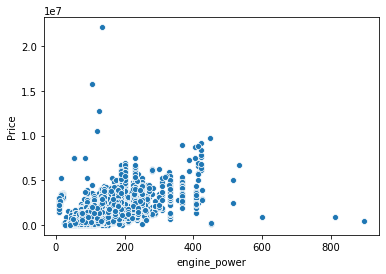

In [21]:
sns.scatterplot(train['engine_power'],train['Price'])

In [22]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                      26757.000
distance               116797.000
manufacture_year            6.000
Age of car                  6.000
engine_displacement       600.000
engine_power               51.000
Vroom Audit Rating          2.000
Price                  972647.625
dtype: float64


In [23]:
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [24]:
Categorical=list(train.select_dtypes(include='object'))
print("Categorical data=",Categorical)
df_train=pd.get_dummies(data=train,columns=(Categorical),drop_first=True)
df_train.columns

Categorical data= ['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'door_count', 'seat_count', 'fuel_type']


Index(['Id', 'distance', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Maker_bmw', 'Maker_fiat', 'Maker_hyundai', 'Maker_maserati',
       'Maker_nissan', 'Maker_skoda', 'Maker_toyota', 'model_avensis',
       'model_aygo', 'model_citigo', 'model_coupe', 'model_i30', 'model_juke',
       'model_micra', 'model_octavia', 'model_panda', 'model_q3', 'model_q5',
       'model_q7', 'model_qashqai', 'model_rapid', 'model_roomster',
       'model_superb', 'model_tt', 'model_x1', 'model_x3', 'model_x5',
       'model_yaris', 'model_yeti', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Owner Type_Fourth & Above',
       'Owner Type_Second', 'Owner Type_Third', 'transmission_man',
       'door_count_2', 'door_count_3', 'door_count_4', 'door_count_5',
    

In [25]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
Id                     5615 non-null int64
Maker                  5615 non-null object
model                  5615 non-null object
Location               5615 non-null object
Distance               5487 non-null float64
Owner Type             5615 non-null object
manufacture_year       5615 non-null int64
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5447 non-null float64
body_type              422 non-null object
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null object
door_count             5615 non-null object
seat_count             5615 non-null object
fuel_type              5615 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 702.0+ KB


In [27]:
test['engine_power'].fillna(test.engine_power.median(),inplace=True)

In [28]:
test['Distance '].fillna(test['Distance '].median(),inplace=True)

In [29]:
test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [30]:
test.drop('body_type',1,inplace=True)

In [31]:
Categorical=list(train.select_dtypes(include='object'))
print("Categorical data=",Categorical)
df_test=pd.get_dummies(data=test,columns=(Categorical),drop_first=True)
df_test.columns

Categorical data= ['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'door_count', 'seat_count', 'fuel_type']


Index(['Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'Maker_bmw', 'Maker_fiat', 'Maker_hyundai', 'Maker_maserati',
       'Maker_nissan', 'Maker_skoda', 'Maker_toyota', 'model_avensis',
       'model_aygo', 'model_citigo', 'model_coupe', 'model_i30', 'model_juke',
       'model_micra', 'model_octavia', 'model_panda', 'model_q3', 'model_q5',
       'model_q7', 'model_qashqai', 'model_rapid', 'model_roomster',
       'model_superb', 'model_tt', 'model_x1', 'model_x3', 'model_x5',
       'model_yaris', 'model_yeti', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Owner Type_Fourth & Above',
       'Owner Type_Second', 'Owner Type_Third', 'transmission_man',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_count_6',
       'door

In [32]:
df_test.head()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker_bmw,Maker_fiat,Maker_hyundai,...,door_count_4,door_count_5,door_count_6,door_count_None,seat_count_3,seat_count_4,seat_count_5,seat_count_7,seat_count_None,fuel_type_petrol
0,11001,150000.0,2007,12,1595,75.0,5,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,11002,29376.0,2014,5,1598,77.0,4,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,11003,30563.0,2014,5,1968,110.0,5,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,11004,8650.0,2015,4,1968,110.0,8,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,11005,6400.0,2015,4,1984,169.0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [46]:
X=df_train.drop(['Price','door_count_2','seat_count_2','seat_count_3','seat_count_6','seat_count_8','seat_count_9'],axis=1)
y=df_train['Price']

In [47]:
Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2636.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:50:16   Log-Likelihood:            -7.7111e+05
No. Observations:               53515   AIC:                         1.542e+06
Df Residuals:                   53459   BIC:                         1.543e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
y_pred=result.predict(df_test)

In [54]:
y_pred

0      -1.369556e+08
1      -1.369694e+08
2      -1.687241e+08
3      -1.690348e+08
4      -1.694431e+08
            ...     
5610   -1.688929e+08
5611   -1.627026e+08
5612   -1.627385e+08
5613   -1.698914e+08
5614   -1.193149e+08
Length: 5615, dtype: float64

In [55]:
df_sub1=pd.DataFrame(y_pred,columns=['Price'])
df_sub1['Unique Id']=df_test.Id

In [57]:
df_sub1.to_csv('Sample_submission1.csv',index=False)